In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjob as mr


### Homework 5

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. Extension of homework to to implement an TD-IDF algorithm  (see below)

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

##Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [1]:
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq
from itertools import islice, izip
import itertools

WORD_RE = re.compile(r"[\w']+")

class BigramCount(MRJob): 
    def mapper(self, _, line): # set bigram 
        words = WORD_RE.findall(line)
        for i in izip(words, islice(words, 1, None)):
            bigram=str(i[0]+" "+i[1])
            yield (bigram, 1)

    def reducer(self, bigram, counts): # count bigram
        yield None,[sum(counts),bigram]
        
    def top10(self,_,values): # set the top 10 value
        for c,val in heapq.nlargest(10,values):
            yield c,val
            
    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer),MRStep(reducer=self.top10)]       


if __name__ == '__main__':
    BigramCount.run()

usage: usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

/Users/yuyiran/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
%run code/bigramscount.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/bigramscount.yuyiran.20181008.141618.412896
Running step 2 of 2...
job output is in /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/bigramscount.yuyiran.20181008.141618.412896/output
Streaming final output from /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/bigramscount.yuyiran.20181008.141618.412896/output...


13037	"of the"
7034	"and the"
7017	"the lord"
6738	"in the"
3799	"to the"
3470	"i will"
3020	"and he"
3013	"shall be"
2714	"all the"
2666	"i have"


Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/bigramscount.yuyiran.20181008.141618.412896...


## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [3]:
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq

WORD_RE = re.compile(r"[\w']+")

class BigramCount2(MRJob):
    def mapper(self, _, line):
        words = WORD_RE.findall(line)
        for i in range(len(words)-1):  # words order
            bigrams=sorted([words[i],words[i+1]])
            yield ' '.join(bigrams),1

    def reducer(self, bigram, counts): # count bigram
        yield None,[sum(counts),bigram]
        
    def top10(self,_,values): # set the top 10 values
        for c,val in heapq.nlargest(10,values):
            yield c,val
            
    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer),MRStep(reducer=self.top10)]       


if __name__ == '__main__':
    BigramCount2.run()

usage: usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

In [5]:
%run code/Bigramscount2.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Creating temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743
Creating temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743
Creating temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743
Running step 2 of 2...
Running step 2 of 2...
Running step 2 of 2...
job output is in /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743/output
job output is in /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743/out

13037	"of the"
7244	"lord the"
7034	"and the"
6739	"in the"
4100	"i will"
3799	"the to"
3129	"and he"
3123	"have i"
3015	"be shall"
2881	"am i"


Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Bigramscount2.yuyiran.20181008.142458.723743...


## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [6]:
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq

WORD_RE = re.compile(r"[\w']+")

class trigramscount(MRJob):
    def mapper(self, _, line): # set trigram
        word = WORD_RE.findall(line)
        for i in range(len(word)-2): # word order
            Trigrams=sorted([word[i],word[i+1],word[i+2]])
            yield ' '.join(Trigrams),1

    def reducer(self, trigrams, counts): # count trigram
        yield None,[sum(counts),trigrams]
        
    def top10(self,_,values): # set the top 10 values
        for c,val in heapq.nlargest(10,values):
            yield c,val
            
    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer),MRStep(reducer=self.top10)]       


if __name__ == '__main__':
    trigramscount.run()

usage: usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

In [10]:
%run code/Trigram.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Creating temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362
Creating temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yu

2053	"lord of the"
1794	"children of the"
1581	"house of the"
1523	"of son the"
1187	"and lord the"
1025	"land of the"
866	"lord saith the"
855	"of out the"
813	"and i will"
762	"of sons the"


Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/Trigram.yuyiran.20181008.145440.363362...


## Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

In [13]:
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import heapq

WORD_RE = re.compile(r"[\w']+")

class wordcount(MRJob):
    def mapper(self, _, line):
        word = WORD_RE.findall(line)
        for i in range(len(word)):
            yield word[i],1

    def reducer(self, key, counts):
        yield None,[sum(counts),key]

    def top10(self,_,values): 
        for c,val in heapq.nlargest(10,values):
            yield c,val

    def steps(self):
        return [MRStep(mapper=self.mapper,reducer=self.reducer),
                MRStep(reducer=self.top10)]
    

if __name__ == '__main__':
    wordcount.run()


usage: usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

In [16]:
%run code/wordcount.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for in

93739	"the"
79182	"and"
53121	"of"
33929	"to"
30240	"i"
24407	"that"
24350	"in"
23504	"a"
17312	"my"
17087	"he"


Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb240000gn/T/wordcount.yuyiran.20181008.151714.405200...
Removing temp directory /var/folders/gc/9wzfft1j25x30gdz09scyb24

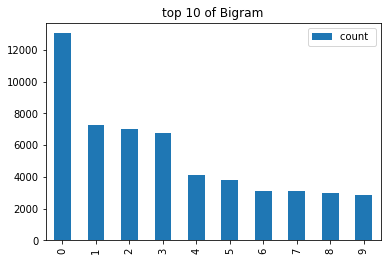

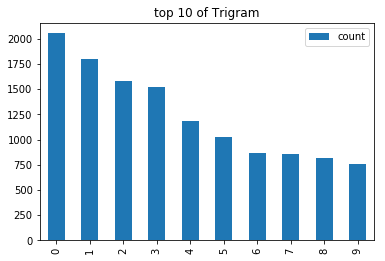

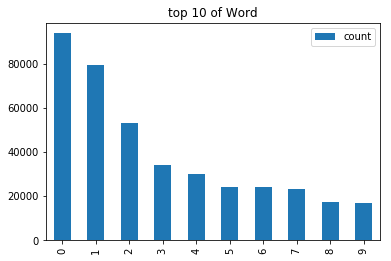

In [8]:
bigram = pd.read_excel("data/bigram.xlsx")
trigram = pd.read_excel("data/trigram.xlsx")
wordcount = pd.read_excel("data/word.xlsx")


bigram.plot(kind='bar',title = 'top 10 of Bigram')
trigram.plot(kind='bar',title = 'top 10 of Trigram')
wordcount.plot(kind='bar',title = 'top 10 of Word')

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



In [ ]:
from mrjob.job import MRJob
import nltk
from nltk.corpus import stopwords

class tokencount(MRJob):
    def mapper(self, _, line):
        english_stopwords=stopwords.words('english')
        tx=nltk.word_tokenize(unicode(line.lower(),'utf-8'))       
        for i in tx: 
            if (len(i)>1) and (i not in english_stopwords) and i.isalnum():
                yield i,1

    def reducer(self, key, val):
        yield key,sum(val)
        

if __name__ == '__main__':
    tokencount.run()
